In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


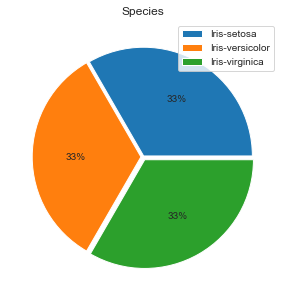

In [5]:
explode = ()
for i in range(1,data.Species.nunique()+1):
    a = i * 0.01
    explode = explode + (a,)
plt.figure(figsize=(5,5))
plt.pie(data.groupby(['Species']).size(), autopct='%1.0f%%', explode=explode)
plt.legend(labels = data.groupby(['Species']).size().index)
plt.title('Species')
plt.show()

In [6]:
percent_missing = data.isna().sum() * 100 / len(data)
for index in percent_missing.index:
    if percent_missing[index] > 0:
        print('missing value', index, '=', percent_missing[index], '%')
if data.isna().sum().sum() == 0:
    print('tidak ada nan value')

tidak ada nan value


In [7]:
data_mean = data.drop('Id', axis=1).groupby(by='Species').mean()

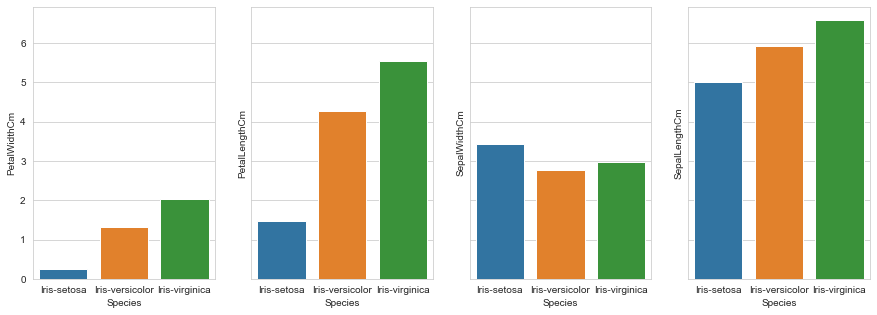

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(15,5))
sns.barplot(ax=axes[0], x=data_mean.index, y=data_mean.PetalWidthCm)
sns.barplot(ax=axes[1], x=data_mean.index, y=data_mean.PetalLengthCm)
sns.barplot(ax=axes[2], x=data_mean.index, y=data_mean.SepalWidthCm)
sns.barplot(ax=axes[3], x=data_mean.index, y=data_mean.SepalLengthCm)
plt.show()

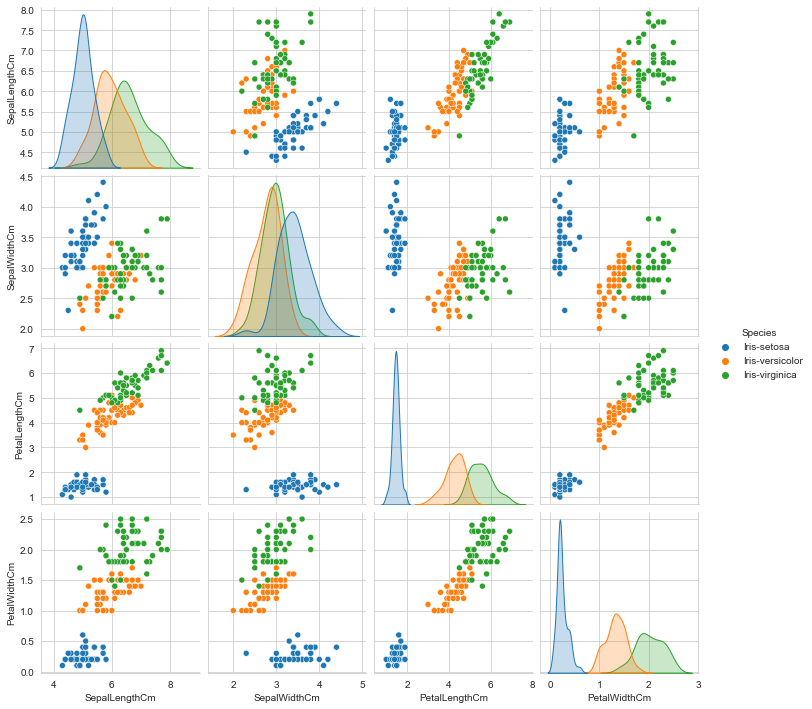

In [9]:
sns.pairplot(data.drop('Id',axis=1), hue='Species')
plt.show()

In [10]:
X = data.drop(['Id','Species'], axis=1)
y = data.Species

<AxesSubplot:>

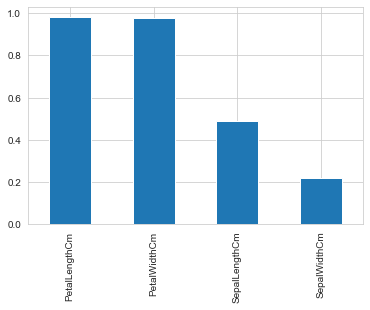

In [11]:
from sklearn.feature_selection import mutual_info_classif
MI_score = mutual_info_classif(X, y)

MI_scoreseries = pd.Series(MI_score,index = X.columns)
MI_scoreseries.sort_values(ascending = False , inplace = True)
MI_scoreseries.plot.bar()

<AxesSubplot:>

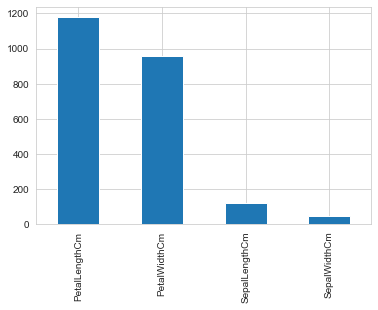

In [12]:
from sklearn.feature_selection import f_classif

f_scores = f_classif(X,y)
f_scores = pd.Series(f_scores[0],index = X.columns)
f_scores.sort_values(ascending = False , inplace = True)
f_scores.plot.bar()

[0.         0.01333333 0.56405596 0.42261071]


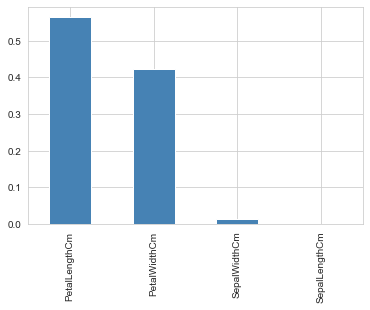

In [13]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)
print(clf.feature_importances_)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot.bar(color='steelblue', figsize=(6,4))
plt.show()

[0.08756503 0.05848301 0.40134744 0.45260453]


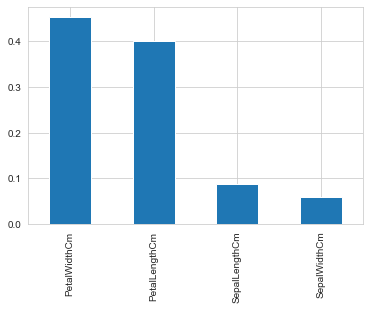

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar', figsize=(6,4))
plt.show()

[0.09163306 0.01996464 0.45618624 0.43221606]


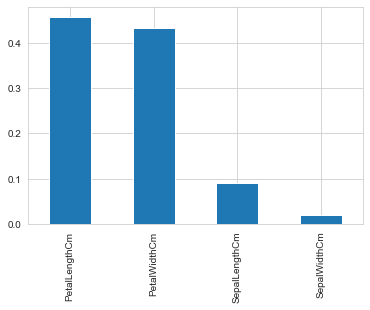

In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar', figsize=(6,4))
plt.show()

<AxesSubplot:>

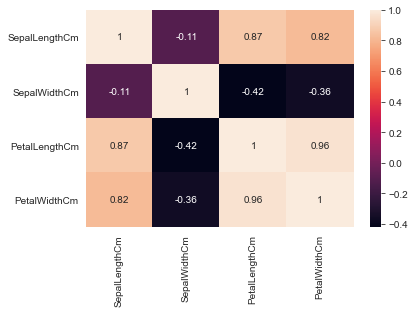

In [16]:
sns.heatmap(data.drop(['Id','Species'], axis=1).corr(), annot=True)

In [17]:
X = data[['PetalWidthCm','SepalLengthCm']]
y = data.Species

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [20]:
print('X_train.shape:', X_train.shape, ', y_train.shape:',y_train.shape)
print('X_test.shape:', X_test.shape, ', y_test.shape:', y_test.shape)

X_train.shape: (105, 2) , y_train.shape: (105,)
X_test.shape: (45, 2) , y_test.shape: (45,)


In [21]:
from sklearn.metrics import classification_report

## Before hyperparameter tuning

In [22]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_predict = dtc.predict(X_test)
target_names = data.Species.unique()
print('Decision Tree Classifier report: \n')
print(classification_report(y_test, dtc_predict, target_names=target_names))

Decision Tree Classifier report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.79      0.85        14
 Iris-virginica       0.81      0.93      0.87        14

       accuracy                           0.91        45
      macro avg       0.91      0.90      0.90        45
   weighted avg       0.92      0.91      0.91        45



In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict = rfc.predict(X_test)
target_names = data.Species.unique()
print('Random Forest Classifier report: \n')
print(classification_report(y_test, rfc_predict, target_names=target_names))

Random Forest Classifier report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.79      0.85        14
 Iris-virginica       0.81      0.93      0.87        14

       accuracy                           0.91        45
      macro avg       0.91      0.90      0.90        45
   weighted avg       0.92      0.91      0.91        45



In [24]:
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
etc_predict = etc.predict(X_test)
target_names = data.Species.unique()
print('Extra Trees Classifier report: \n')
print(classification_report(y_test, etc_predict, target_names=target_names))

Extra Trees Classifier report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.92      0.79      0.85        14
 Iris-virginica       0.81      0.93      0.87        14

       accuracy                           0.91        45
      macro avg       0.91      0.90      0.90        45
   weighted avg       0.92      0.91      0.91        45



## After hyperparameter tuning with `GridSearchCV`

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
print('dtc.get_params():\n',dtc.get_params(),'\n')
print('rfc.get_params():\n',rfc.get_params(),'\n')
print('etc.get_params():\n',etc.get_params(),'\n')

dtc.get_params():
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'} 

rfc.get_params():
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False} 

etc.get_params():
 {'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impuri

In [29]:
parameter_dtc = {'criterion': ['gini','entropy'],
                 'splitter': ['best','random'],
                 'max_depth': np.arange(1,21),
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 }

parameter_rfc = {'bootstrap': [True, False],
                 'max_depth': [10, 20, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 }

parameter_etc = {'bootstrap': [True, False],
                 'max_depth': [10, 20, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1, 2, 4],
                 'min_samples_split': [2, 5, 10],
                 }

In [30]:
gs_dtc = GridSearchCV(estimator=dtc, param_grid=parameter_dtc, cv=10).fit(X_train, y_train)
gs_rfc = GridSearchCV(estimator=rfc, param_grid=parameter_rfc, cv=10).fit(X_train, y_train)
gs_etc = GridSearchCV(estimator=etc, param_grid=parameter_etc, cv=10).fit(X_train, y_train)

In [31]:
gs_dtc_pred = gs_dtc.predict(X_test)
gs_rfc_pred = gs_rfc.predict(X_test)
gs_etc_pred = gs_etc.predict(X_test)

In [37]:
print('gs_dtc.best_params_ :',gs_dtc.best_params_)
print('gs_dtc.best_params_ :',gs_rfc.best_params_)
print('gs_dtc.best_params_ :',gs_etc.best_params_)

gs_dtc.best_params_ {} {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}


In [32]:
print('Decision Tree Classifier report: \n')
print(classification_report(y_test, gs_dtc_pred, target_names=target_names))

Decision Tree Classifier report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [33]:
print('Random Forest Classifier report: \n')
print(classification_report(y_test, gs_rfc_pred, target_names=target_names))

Random Forest Classifier report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [34]:
print('Extra Tree Classifier report: \n')
print(classification_report(y_test, gs_etc_pred, target_names=target_names))

Extra Tree Classifier report: 

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

